In [1]:
from pymatgen import Structure
from pymatgen.phonon.bandstructure import *
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.phonon.plotter import*
import matplotlib.pyplot as plt
import numpy as np

# **Téléchargement de la structure de bande de phonons du matériau**

In [2]:
with MPRester("KCN5RO8FHahQJZKZ") as m:
    LiZnP = m.get_phonon_bandstructure_by_material_id("mp-10182")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



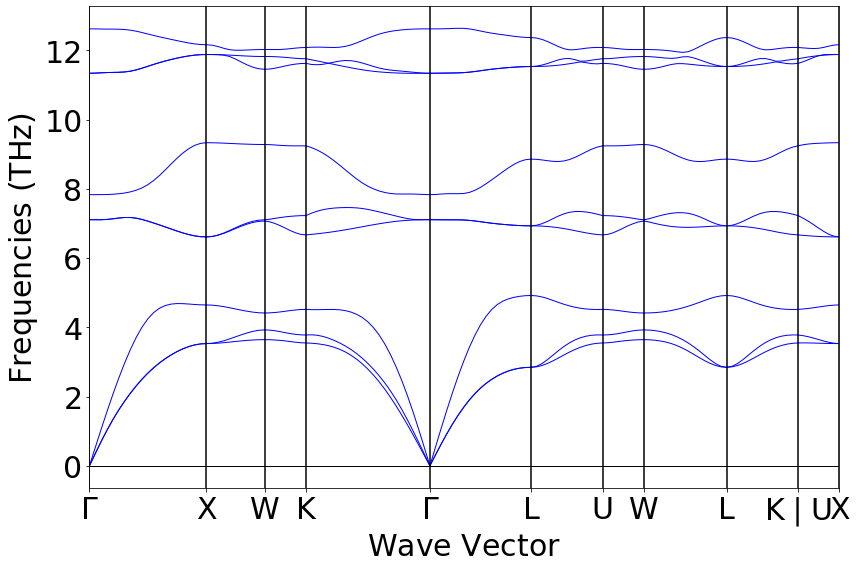

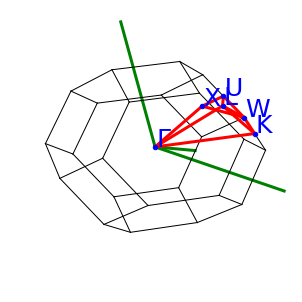

In [3]:
phonon_plot = PhononBSPlotter(LiZnP) 
phonon_plot.get_plot() 
phonon_plot.plot_brillouin()

# **Calcul de la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin**
Les bandes accoustiques sont les bandes où la fréquence du phonon associée est nulle au centre de la zone de Brillouin. 

Il existe alors 3 directions : Γ − X , K − Γ et Γ - L. 

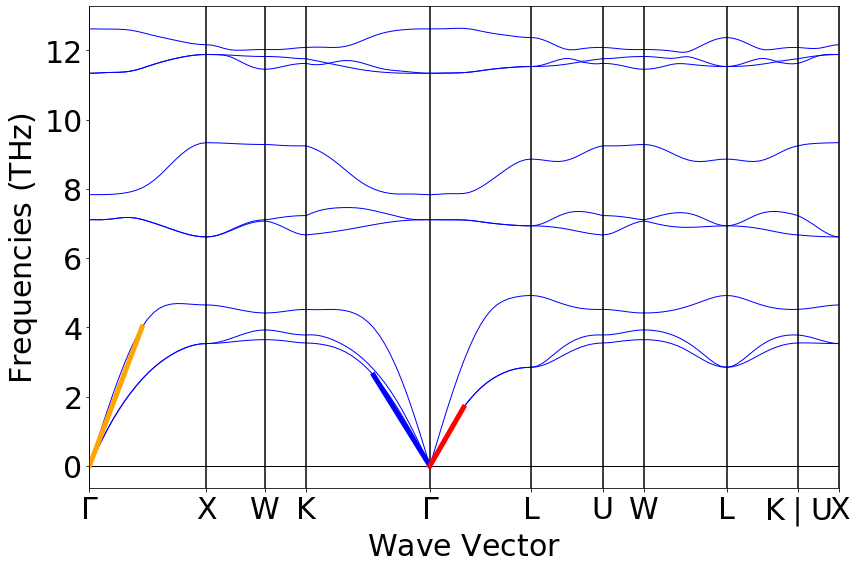

In [4]:
data = phonon_plot.bs_plot_data() 
distances = data.get("distances")
frequency = data.get("frequency")
phonon_plot.get_plot()

#frequency[branch][qpoint][mode] -> branch 0,3 et 4 
#branch modifie la direction où on est 
#qpoint choisit la bande que l'on suit sur cette direction 
#mode détermine la position dans la direction donnée

# Première pente en jaune
plt.plot([distances[0][0],distances[0][9]],[frequency[0][2][0],frequency[0][2][9]], color='orange', lw=5)
# Deuxième pente en bleu
plt.plot([distances[3][12],distances[3][-1]],[frequency[3][0][12],frequency[3][0][-1]], color='blue', lw=5)
# Troisième pente en rouge
plt.plot([distances[4][0], distances[4][6]],[frequency[4][1][0],frequency[4][1][6]], color='red', lw=5)

La vitesse du son dans un cristal se calcule comme la dérivée partielle de la fréquence $\omega$ par rapport au vecteur d'onde q. Attention $\omega$ = 2$\pi$f, et notre graphe est en f, il faut donc ajouter un facteur 2$\pi$. 
On fait également l'hypothèse que l'on travaille avec des grandes longueurs d'onde c'est à dire avec des petits vecteurs d'onde. On fait une estimation de la dérivée en calculant la pente le plus près de l'origine possible.
Il faut également faire attention aux conversions d'unités. Les fréquences sont en THz ( $10^{12}$ Hz ) et les distances sont en Angström ( $10^{-10}$ m ). Il faut donc miltiplier la réponse finale par $10^{2}$.

In [5]:
print("La vitesse du son de la troisième branche dans la direction Gamma - X vaut {} m/s.".format(2*np.pi*np.abs((frequency[0][2][1]-frequency[0][2][0])*(10**2))/(distances[0][1]-distances[0][0])))
print("La vitesse du son de la première branche dans la direction K - Gamma vaut {} m/s.".format(2*np.pi*np.abs((frequency[3][0][-1] - frequency[3][0][-2])*(10**2))/(distances[3][-1]-distances[3][-2])))
print("La vitesse du son de la deuxième branche dans la direction Gamma - L vaut {} m/s.".format(2*np.pi*np.abs((frequency[4][1][1]-frequency[4][1][0])*(10**2))/(distances[4][1]-distances[4][0])))

La vitesse du son de la troisième branche dans la direction Gamma - X vaut 6015.721593404329 m/s.
La vitesse du son de la première branche dans la direction K - Gamma vaut 3572.5346500188034 m/s.
La vitesse du son de la deuxième branche dans la direction Gamma - L vaut 3724.972709991566 m/s.
